In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
#IMPORTS
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import datetime

from src.data.make_dataset import *
from src.data.modal_data import *

In [3]:
# GET THE DATA
package_folder = os.path.dirname(os.path.dirname(os.path.dirname(os.getcwd())))
data_folder = os.path.join(package_folder, 'data')
data_folder

location = 'nw2'
turbine = 'c02'

In [4]:
turbine_data = get_turbine_data(data_folder, location, turbine)
mpe_ss_data = get_mpe_data(turbine_data, 'SS', location, turbine)

c:\Users\Max\Documents\OWI_LAB\Code\DCE_EOVnorm\dce_eov_normalisation\data\raw\nw2\nw2c02.parquet


In [5]:
turbine_data

,location,mean_NW2_C02_rpm,mean_NW2_C02_yaw,std_NW2_C02_pitch,mean_NW2_C02_pitch,mean_NW2_C02_power,std_NW2_C02_towerxacc,std_NW2_C02_toweryacc,std_NW2_C02_windspeed,mean_NW2_C02_towerxacc,...,min_NW2_C02_NAC_ACC_SS,rms_NW2_C02_NAC_ACC_FA,rms_NW2_C02_NAC_ACC_SS,std_NW2_C02_NAC_ACC_FA,std_NW2_C02_NAC_ACC_SS,mean_NW2_C02_NAC_ACC_FA,mean_NW2_C02_NAC_ACC_SS,rms1p_NW2_C02_NAC_ACC_Z,rms1p_NW2_C02_NAC_ACC_FA,rms1p_NW2_C02_NAC_ACC_SS
timestamp,,,,,,,,,,,,,,,,,,,,,
2022-10-01 00:00:00+00:00,NW2C02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.031085,0.012867,0.010128,0.012867,0.010128,0.0,0.0,NaN,NaN,NaN
2022-10-01 00:10:00+00:00,NW2C02,10.445,184.505,1.286229,13.345,9525.121,95.415619,97.464722,1.586,-13.932862,...,-0.039299,0.012175,0.010301,0.012175,0.010301,0.0,0.0,0.000463,0.004272,0.004826
2022-10-01 00:20:00+00:00,NW2C02,10.445,184.533,0.921634,14.352,9524.993,101.124157,101.845197,1.215,-4.225225,...,-0.042553,0.012015,0.010146,0.012015,0.010146,0.0,0.0,0.000445,0.004003,0.004124
2022-10-01 00:30:00+00:00,NW2C02,10.445,184.533,0.685358,13.848,9525.056,93.875489,96.540543,0.914,-12.766372,...,-0.034660,0.011474,0.009650,0.011474,0.009650,0.0,0.0,0.000494,0.004575,0.004302
2022-10-01 00:40:00+00:00,NW2C02,10.445,187.218,3.482077,9.372,9524.672,93.053587,93.762805,2.418,-9.416667,...,-0.038500,0.011134,0.009757,0.011134,0.009757,0.0,0.0,0.000417,0.003797,0.004092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-31 23:20:00+00:00,NW2C02,10.445,238.723,1.007112,-2.042,5812.736,NaN,NaN,1.305,NaN,...,-0.039469,0.011345,0.012381,0.011345,0.012381,0.0,0.0,0.000312,0.003356,0.006044
2023-07-31 23:30:00+00:00,NW2C02,10.445,238.751,0.720804,-2.993,7098.048,NaN,NaN,0.992,NaN,...,-0.049512,0.012081,0.012972,0.012081,0.012972,0.0,0.0,0.000362,0.003642,0.005276
2023-07-31 23:40:00+00:00,NW2C02,10.445,238.723,1.034753,-3.525,8600.000,NaN,NaN,0.828,NaN,...,-0.051361,0.011660,0.014247,0.011660,0.014247,0.0,0.0,0.000383,0.003466,0.005489


In [22]:
from src.data.harmonics import *
harmonics_data = harmonics(turbine_data['mean_NW2_C02_rpm'], [1,3,6, 9])

In [8]:
harmonics_data

,harmonic_1p,harmonic_3p,harmonic_6p,harmonic_9p
timestamp,,,,
2022-10-01 00:00:00+00:00,NaN,NaN,NaN,NaN
2022-10-01 00:10:00+00:00,0.174083,0.52225,1.0445,1.56675
2022-10-01 00:20:00+00:00,0.174083,0.52225,1.0445,1.56675
2022-10-01 00:30:00+00:00,0.174083,0.52225,1.0445,1.56675
2022-10-01 00:40:00+00:00,0.174083,0.52225,1.0445,1.56675
...,...,...,...,...
2023-07-31 23:20:00+00:00,0.174083,0.52225,1.0445,1.56675
2023-07-31 23:30:00+00:00,0.174083,0.52225,1.0445,1.56675
2023-07-31 23:40:00+00:00,0.174083,0.52225,1.0445,1.56675


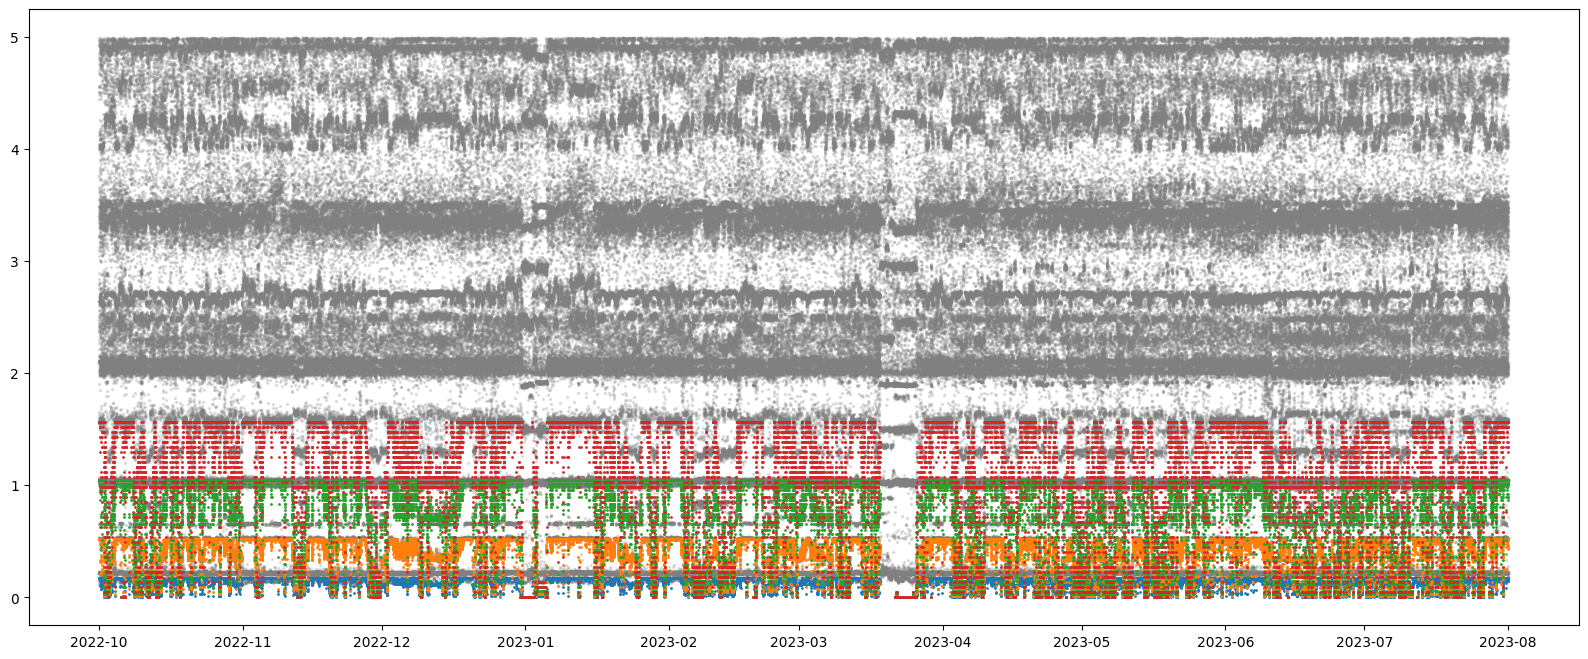

In [9]:
plt.figure(figsize=(20,8))    
plt.scatter(mpe_ss_data.index, mpe_ss_data['mean_frequency'], s=2, alpha=0.2, color='grey')
for harmonic in harmonics_data.columns:
    plt.scatter(harmonics_data.index, harmonics_data[harmonic], s=1, label=harmonic, alpha=1.0)
plt.show()
plt.close()

C:\Users\Max\AppData\Local\Temp\ipykernel_14140\3237774721.py:9: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handles in legend.legendHandles:


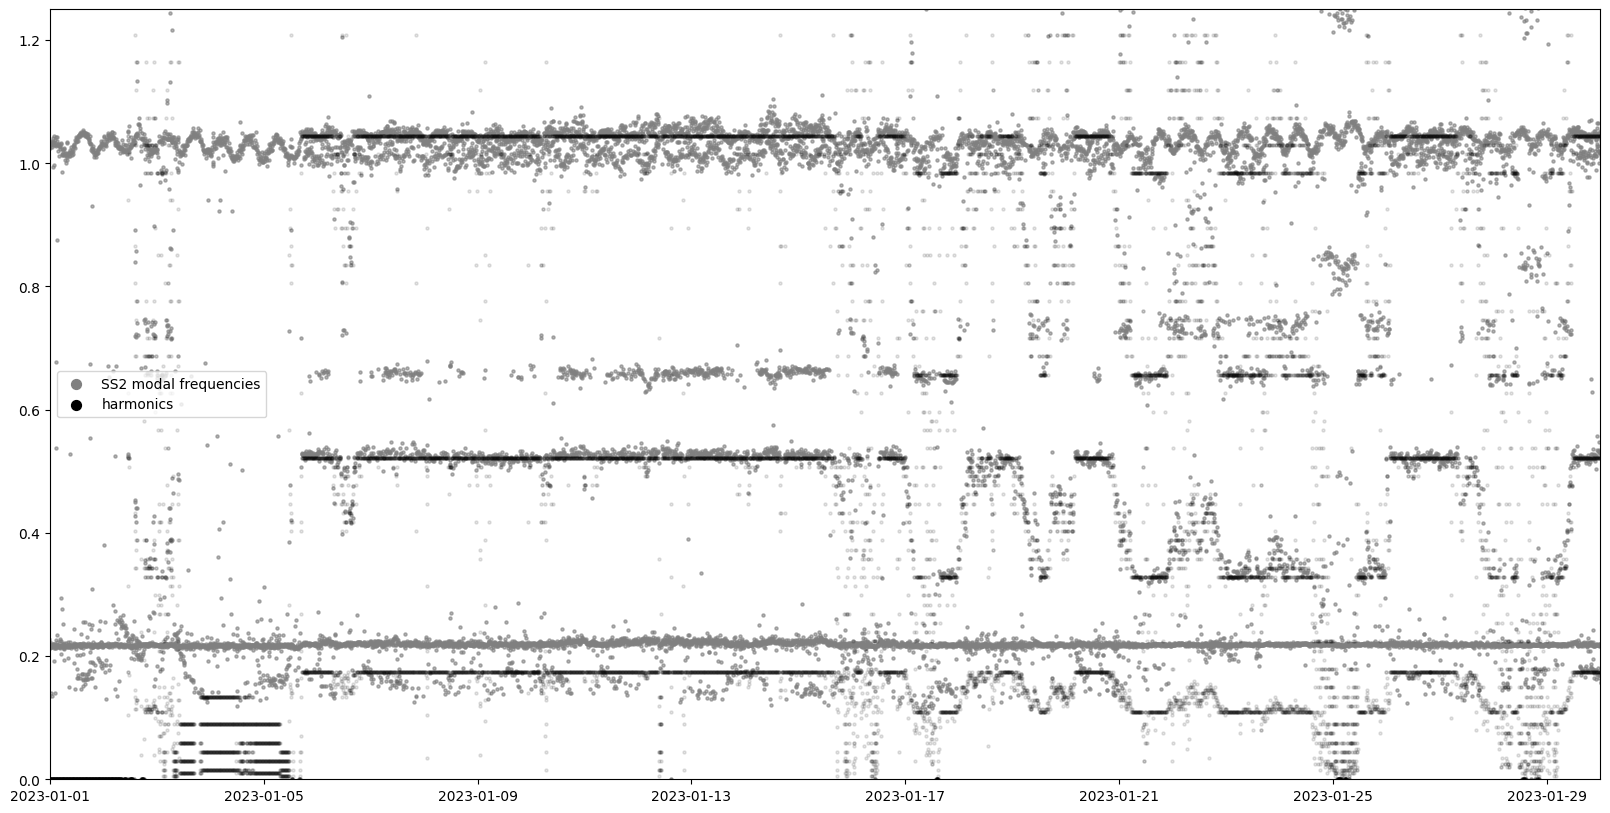

In [10]:
plt.figure(figsize=(20,10))

plt.scatter(mpe_ss_data.index, mpe_ss_data['mean_frequency'], s=5, alpha=0.6, color='grey')
for harmonic in harmonics_data.columns:
    plt.scatter(harmonics_data.index, harmonics_data[harmonic], s=5, alpha=0.1, color='k')
plt.xlim(datetime.datetime(2023, 1, 1), datetime.datetime(2023, 1, 30))
plt.ylim(0, 1.25)
legend = plt.legend(loc='center left', labels=['SS2 modal frequencies', 'harmonics'])
for handles in legend.legendHandles:
    handles.set_sizes([50])
    handles.set_alpha(1.0)

plt.show()
plt.close()

C:\Users\Max\AppData\Local\Temp\ipykernel_14140\1743202378.py:9: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handles in legend.legendHandles:


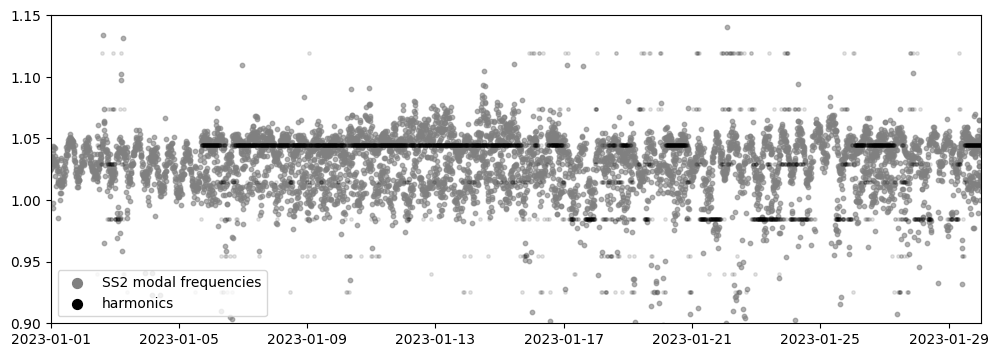

C:\Users\Max\AppData\Local\Temp\ipykernel_14140\1743202378.py:24: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handles in legend.legendHandles:


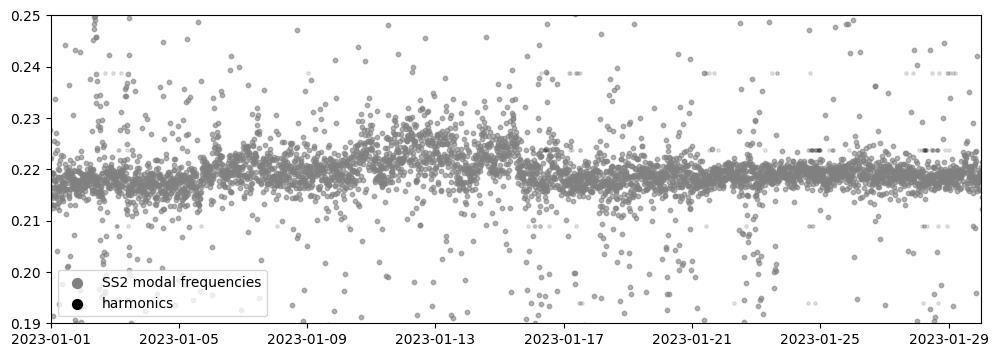

In [11]:
plt.figure(figsize=(12,4))

plt.scatter(mpe_ss_data.index, mpe_ss_data['mean_frequency'], s=10, alpha=0.6, color='grey')
for harmonic in harmonics_data.columns:
    plt.scatter(harmonics_data.index, harmonics_data[harmonic], s=6, alpha=0.1, color='k')
plt.xlim(datetime.datetime(2023, 1, 1), datetime.datetime(2023, 1, 30))
plt.ylim(0.9, 1.15)
legend = plt.legend(loc='lower left', labels=['SS2 modal frequencies', 'harmonics'])
for handles in legend.legendHandles:
    handles.set_sizes([50])
    handles.set_alpha(1.0)

plt.show()
plt.close()

plt.figure(figsize=(12,4))

plt.scatter(mpe_ss_data.index, mpe_ss_data['mean_frequency'], s=10, alpha=0.6, color='grey')
for harmonic in harmonics_data.columns:
    plt.scatter(harmonics_data.index, harmonics_data[harmonic], s=6, alpha=0.1, color='k')
plt.xlim(datetime.datetime(2023, 1, 1), datetime.datetime(2023, 1, 30))
plt.ylim(0.19, 0.25)
legend = plt.legend(loc='lower left', labels=['SS2 modal frequencies', 'harmonics'])
for handles in legend.legendHandles:
    handles.set_sizes([50])
    handles.set_alpha(1.0)

plt.show()
plt.close()

In [12]:
rpm_split = 6
low_rpm_timestamps = turbine_data[turbine_data['mean_NW2_C02_rpm'] < rpm_split].index
mpe_ss_data_lowrpm = mpe_ss_data[mpe_ss_data.index.isin(low_rpm_timestamps)]

C:\Users\Max\AppData\Local\Temp\ipykernel_14140\610727200.py:11: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handles in legend.legendHandles:


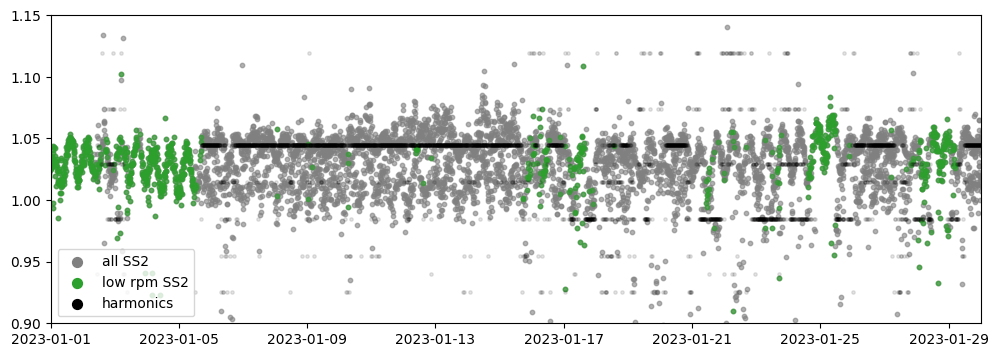

In [13]:
plt.figure(figsize=(12,4))

plt.scatter(mpe_ss_data.index, mpe_ss_data['mean_frequency'], s=10, alpha=0.6, color='grey')
plt.scatter(mpe_ss_data_lowrpm.index, mpe_ss_data_lowrpm['mean_frequency'], s=10, alpha=0.6, color='tab:green')

for harmonic in harmonics_data.columns:
    plt.scatter(harmonics_data.index, harmonics_data[harmonic], s=6, alpha=0.1, color='k')
plt.xlim(datetime.datetime(2023, 1, 1), datetime.datetime(2023, 1, 30))
plt.ylim(0.9, 1.15)
legend = plt.legend(loc='lower left', labels=['all SS2', 'low rpm SS2', 'harmonics'])
for handles in legend.legendHandles:
    handles.set_sizes([50])
    handles.set_alpha(1.0)

plt.show()
plt.close()

In [14]:
from pytz import utc
mpe_ss2_data_plot = mpe_ss_data.copy()
mpe_ss2_data_plot = mpe_ss2_data_plot.loc[datetime.datetime(2023, 1, 1, tzinfo=utc):datetime.datetime(2023, 1, 30, tzinfo=utc)]
mpe_ss2_data_plot.reset_index(inplace=True)
mpe_ss2_data_plot = mpe_ss2_data_plot[mpe_ss2_data_plot['mean_frequency'] < 1.2]
mpe_ss2_data_plot = mpe_ss2_data_plot[mpe_ss2_data_plot['mean_frequency'] > 0.9]


In [15]:
from data_selector.lasso_data_selector import *
selector = LassoDataSelector(mpe_ss2_data_plot, fig_size=(1200,600), marker_size=5)
display(selector.select_data())

In [20]:
selector.all_confirmed_data

{1: Empty DataFrame
 Columns: []
 Index: [],
 2: Empty DataFrame
 Columns: []
 Index: [],
 3:                      timestamp algorithm  mean_damping  mean_frequency  size  \
 1    2023-01-01 00:00:00+00:00      lscf      1.110464        1.025560    41   
 13   2023-01-01 00:10:00+00:00      lscf      1.906681        1.031110    41   
 25   2023-01-01 00:20:00+00:00      lscf      1.697495        1.034550    34   
 36   2023-01-01 00:30:00+00:00      lscf      1.550488        1.030779    41   
 48   2023-01-01 00:40:00+00:00      lscf      1.359080        1.036035    41   
 ...                        ...       ...           ...             ...   ...   
 7897 2023-01-05 16:50:00+00:00      lscf      1.282606        0.997420    22   
 7898 2023-01-05 16:50:00+00:00      lscf      0.947421        1.040416    41   
 7914 2023-01-05 17:00:00+00:00      lscf      0.808219        1.048536    48   
 7926 2023-01-05 17:10:00+00:00      lscf      0.956711        1.044261    67   
 7936 2023-01-05

In [17]:
selected_data = pd.concat([selector.all_confirmed_data[i] for i in selector.all_confirmed_data.keys()]).set_index('timestamp')


ValueError: No objects to concatenate

In [ ]:
selected_data.to_csv(os.path.join(data_folder, 'processed','nw2', turbine+'_ss2_selected_data.csv'))

NameError: name 'selected_data' is not defined

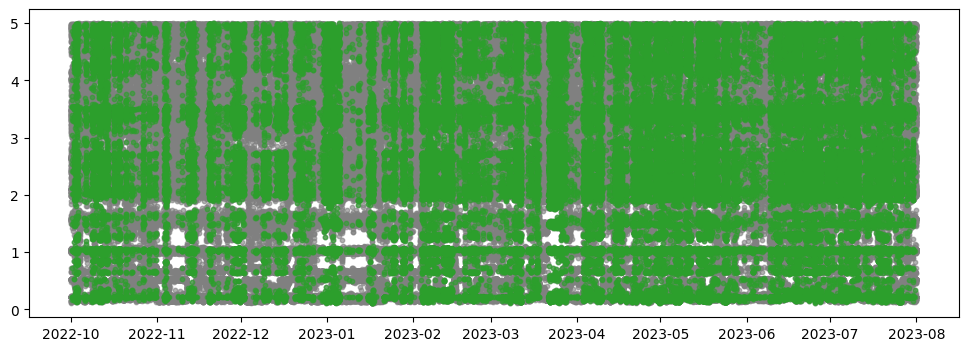

In [21]:
plt.figure(figsize=(12,4))

plt.scatter(mpe_ss_data.index, mpe_ss_data['mean_frequency'], s=10, alpha=0.6, color='grey')
plt.scatter(mpe_ss_data_lowrpm.index, mpe_ss_data_lowrpm['mean_frequency'], s=10, alpha=0.6, color='tab:green')
plt.scatter(selected_data.index, selected_data['mean_frequency'], s=10, alpha=0.6, color='tab:orange')

for harmonic in harmonics_data.columns:
    plt.scatter(harmonics_data.index, harmonics_data[harmonic], s=6, alpha=0.1, color='k')
plt.xlim(datetime.datetime(2023, 1, 1), datetime.datetime(2023, 1, 30))
plt.ylim(0.9, 1.15)
legend = plt.legend(loc='lower left', labels=['all SS2', 'low rpm SS2', 'all selected data', 'harmonics'])
for handles in legend.legendHandles:
    handles.set_sizes([50])
    handles.set_alpha(1.0)

plt.show()
plt.close()